Define a function so that it generates 3 objects(A, B, C) with probability 0.3, 0.2, 0.5


In [1]:
import numpy as np
def generate_random():
    a = np.random.random()
    if a<0.3:
        return "A"
    elif a>0.3 and a<0.5:
        return "B"
    else:
        return "C"
N = 10000
a, b, c=0,0,0
for ix in range(N):
    k = generate_random()
    if k is "A":
        a+=1
    elif k is "B":
        b+=1
    else:
        c+=1
print(float(a)/N, float(b)/N, float(c)/N)        

0.3032 0.202 0.4948


# KNN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import cv2

In [3]:
mean1=np.array([.3, .6])
mean2=np.array([4.,6.])

cov1=np.array([[1., .3],
              [.3, 5.]])
cov2=np.array([[2., 1.],
              [1., 4.]])

data1=np.random.multivariate_normal(mean1, cov1, 250)
data2=np.random.multivariate_normal(mean2, cov2, 250)
#print(data1.shape)


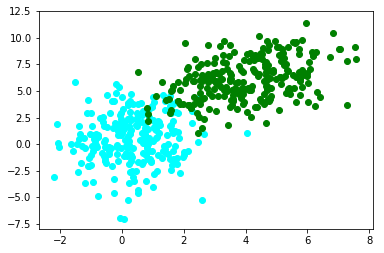

In [4]:
plt.figure(0)
plt.scatter(data1[:,0], data1[:,1], color='cyan')
plt.scatter(data2[:,0], data2[:,1], color='green')
plt.show()

Problem Statement

Given the bunch of clusters and which class/category each point belongs to, can you predict in which class will any given point lie?

In [5]:
data_x=np.concatenate((data1, data2), axis=0)
print(data_x.shape)
data_y=np.zeros((500, 1))
data_y[250:]=1

data=np.concatenate((data_x, data_y), axis=1)
print(data.shape)

(500, 2)
(500, 3)


In [6]:
def distance(v1, v2):
    return np.linalg.norm(v1-v2)
def knn(train, test, k=3):
    dist=[]
    for i in range(train.shape[0]):
        ix=train[i,:-1]
        iy=train[i,-1]
        d=distance(ix, test)
        dist.append([d,iy])
    dk=sorted(dist, key=lambda x:x[0])[:k]
    labels=np.array(dk)[:, -1]
    output=np.unique(labels, return_counts=True)
    index=np.argmax(output[1])
    return output[0][index]
    

In [7]:
np.argmax?
x = np.array([-2, 10.0])
print(knn(data, x, k=5))

1.0


In [8]:
from sklearn.datasets import load_digits
load_digits(return_X_y=True)[0].shape

(1797, 64)

In [9]:
data=load_digits(return_X_y=True)
X=data[0]
Y=data[1]
print(X.shape)
print(Y.shape)#according to the output it means 1797 rows and 1 column but on output X it gives 1797 columns
print((Y.reshape((-1,1)).shape))
print(Y)

(1797, 64)
(1797,)
(1797, 1)
[0 1 2 ... 8 9 8]


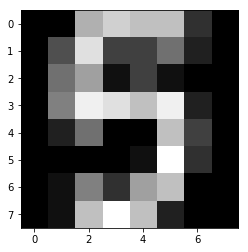

In [10]:
plt.figure(0)
plt.imshow(X[562].reshape(8,8), cmap='gray')
plt.show()

In [11]:
ds = np.concatenate((X, Y.reshape((-1, 1))), axis=1)
print(ds.shape)
trainset=ds[:1500]
testset=ds[1500:]
print(trainset.shape, testset.shape)

(1797, 65)
(1500, 65) (297, 65)


In [12]:
def test_on_set(trainset, testing, k=3):
    pred=[]
    succ=[]
    for ix in range(testing.shape[0]):
        out=knn(trainset, testing[ix,:-1], k=k)
        pred.append(out)
        succ.append(testing[ix, -1])
    pred=np.array(pred)
    succ=np.array(succ)
    acc=float((pred==succ).sum())/len(pred)
    print("Accuracy:{} with k:{}".format(acc, k))
    return acc



In [13]:
accs=[]
kx =[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
for ix in kx:
    acx=test_on_set(trainset, testset, k=ix)
    accs.append(acx)

Accuracy:0.9562289562289562 with k:2
Accuracy:0.9595959595959596 with k:3
Accuracy:0.9595959595959596 with k:4
Accuracy:0.9562289562289562 with k:5
Accuracy:0.9461279461279462 with k:6
Accuracy:0.9461279461279462 with k:7
Accuracy:0.9427609427609428 with k:8
Accuracy:0.9427609427609428 with k:9
Accuracy:0.9427609427609428 with k:10
Accuracy:0.9427609427609428 with k:11
Accuracy:0.9427609427609428 with k:12
Accuracy:0.9393939393939394 with k:13
Accuracy:0.9427609427609428 with k:14
Accuracy:0.9393939393939394 with k:15
Accuracy:0.9461279461279462 with k:16
Accuracy:0.9427609427609428 with k:17
Accuracy:0.9393939393939394 with k:18


[0.9562289562289562, 0.9595959595959596, 0.9595959595959596, 0.9562289562289562, 0.9461279461279462, 0.9461279461279462, 0.9427609427609428, 0.9427609427609428, 0.9427609427609428, 0.9427609427609428, 0.9427609427609428, 0.9393939393939394, 0.9427609427609428, 0.9393939393939394, 0.9461279461279462, 0.9427609427609428, 0.9393939393939394]


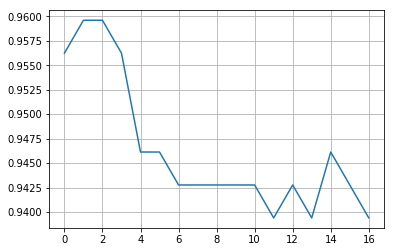

In [63]:
print(accs)
plt.figure(0)
plt.grid("on")
plt.plot(accs)

# Using sklearn for KNN

In [23]:
from sklearn.datasets import load_digits
datax, datay=load_digits(return_X_y=True)
#print(datax.shape, datay.shape)
def test(datax, datay, k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(datax[:1500], datay[:1500])
    pred=neigh.predict(datax[1500:])
    acc=neigh.score(datax[1500:], datay[1500:])
    print("Accuracy:{} with k:{}".format(acc, k))
    return acc

In [24]:
accs=[]
kx =[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
for ix in kx:
    acx=test(datax, datay, k=ix)    
    accs.append(acx)



Accuracy:0.9562289562289562 with k:2
Accuracy:0.9595959595959596 with k:3
Accuracy:0.9595959595959596 with k:4
Accuracy:0.9562289562289562 with k:5
Accuracy:0.9461279461279462 with k:6
Accuracy:0.9461279461279462 with k:7
Accuracy:0.9427609427609428 with k:8
Accuracy:0.9427609427609428 with k:9
Accuracy:0.9427609427609428 with k:10
Accuracy:0.9427609427609428 with k:11
Accuracy:0.9427609427609428 with k:12
Accuracy:0.9393939393939394 with k:13
Accuracy:0.9427609427609428 with k:14
Accuracy:0.9393939393939394 with k:15
Accuracy:0.9461279461279462 with k:16
Accuracy:0.9427609427609428 with k:17
Accuracy:0.9393939393939394 with k:18


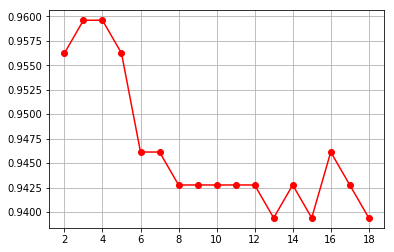

In [25]:
plt.figure(0)
plt.grid("on")
plt.plot(kx, accs, 'o-r')
plt.show()